<a href="https://colab.research.google.com/github/duaneywadey/colab/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


water_qual = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
water_qual.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water_qual.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


In [ ]:
water_qual['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
water_qual.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_qual.shape

(3276, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


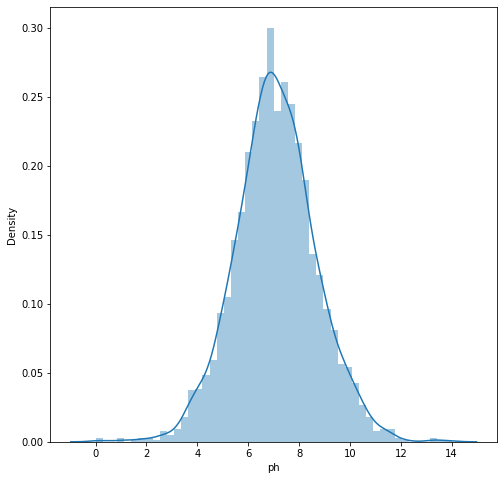

In [ ]:
# Analyze the distribution of data

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(water_qual.ph)

In [ ]:
water_qual['ph'].fillna(water_qual['ph'].mean(), inplace=True)

In [ ]:
water_qual.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


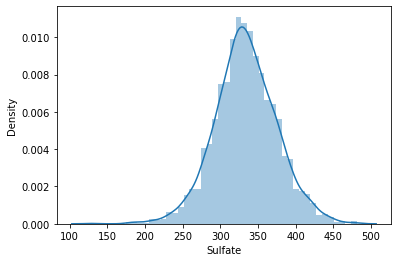

In [ ]:
sns.distplot(water_qual.Sulfate)

In [ ]:
water_qual['Sulfate'].fillna(water_qual['Sulfate'].median(), inplace=True)

In [ ]:
water_qual.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


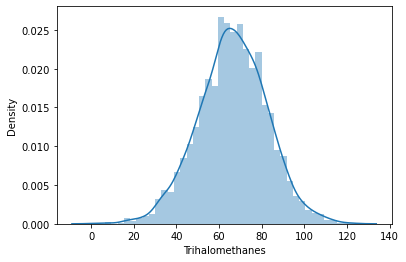

In [ ]:
sns.distplot(water_qual.Trihalomethanes)

In [ ]:
water_qual['Trihalomethanes'].fillna(water_qual['Trihalomethanes'].mean(), inplace=True)

In [ ]:
water_qual.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water_qual.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.533513,3.968328


In [ ]:
X = water_qual.drop('Potability', axis=1)
print(X)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [ ]:
Y = water_qual['Potability']
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X_train, Y_train)

            ph    Hardness        Solids  Chloramines     Sulfate  \
3216  5.609235  216.122673  14825.934502     7.001788  355.211678   
3050  8.479593  200.765679  14901.808144     7.379506  333.073546   
739   6.772157  196.900098  13790.296202     9.575053  333.073546   
2100  4.894278  184.552715  10922.541994     7.461703  352.830222   
2035  5.763773  183.073629  22025.696606     8.952896  333.073546   
...        ...         ...           ...          ...         ...   
2347  5.429335  183.439383  15265.407564     5.714731  394.001195   
1608  6.919726  194.859000  35558.731647     6.371978  299.786711   
2541  5.735724  158.318741  25363.016594     7.728601  377.543291   
2575  6.914868  206.249937  10343.378848     7.771206  324.383170   
3240  6.102307  205.999038  23406.859160     8.061864  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3216    330.092674        9.779518        41.249977   3.224676  
3050    485.093167       16.806347       

In [ ]:
# Import our algorithm

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Evaluate our model using X_test data
X_test_prediction = model.predict(X_test)

# Test the accuracy of our data
test_data_prediction = accuracy_score(X_test_prediction, Y_test)
print('Accuracy: ', test_data_prediction)

Accuracy:  0.6966463414634146


In [ ]:
print("Prediction: ", X_test_prediction)
print("Real values: ", Y_test)

Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0

In [ ]:
# Make a tuple of our input data
input_data = (7.201702374896836,147.71108612452176,37308.99415948845,5.677451117249203,279.1644463467536,395.97682448817943,13.326125005608617,63.62689390393926,3.8832501984983283)

# Convert our input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape our numpy array. If we don't reshape, our model wouldn't know that we're predicting only for one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
